In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv("MSN.csv")
data.head(5)

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Date/Time      135354 non-null  object 
 2   Open           135354 non-null  float64
 3   High           135354 non-null  float64
 4   Low            135354 non-null  float64
 5   Close          135354 non-null  float64
 6   Volume         135354 non-null  int64  
 7   Open Interest  135354 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 8.3+ MB


In [9]:
data.describe()

,Open,High,Low,Close,Volume,Open Interest
count,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
mean,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
std,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0


In [13]:
a =  data['Open Interest'].value_counts().to_frame()
b =  data['Open'].value_counts().to_frame()
c = data['High'].value_counts().to_frame()
d = data['Low'].value_counts().to_frame()
f = data['Close'].value_counts().to_frame()
g = data['Volume'].value_counts().to_frame()
a

,count
Open Interest,
0,135354


In [14]:
b

,count
Open,
80.00,986
85.00,934
84.00,917
57.00,875
57.10,831
...,...
63.54,1
95.86,1
63.64,1


In [15]:
c

,count
High,
80.00,988
85.00,957
84.00,947
57.10,869
57.00,834
...,...
114.40,1
114.30,1
77.87,1


In [5]:
df_1 = data[['Open','High','Low',"Volume",'Open Interest']]
target = data[['Close']]

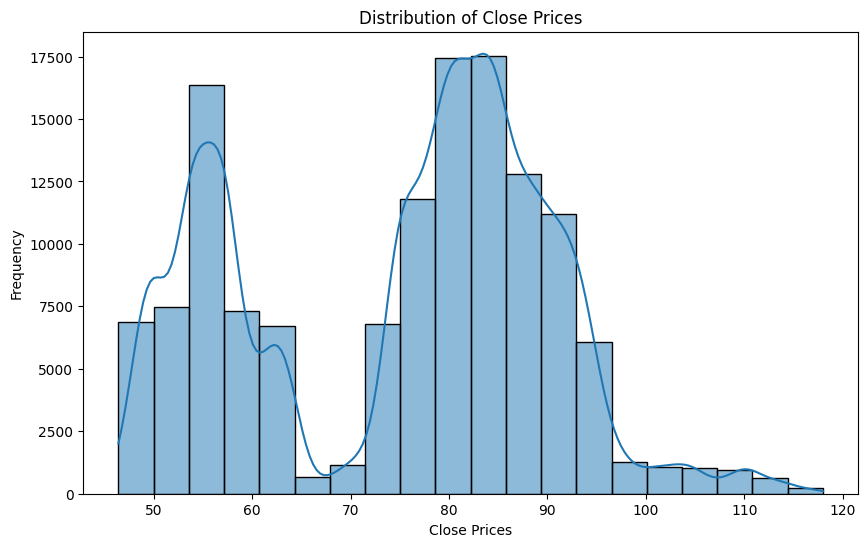

In [6]:
## Truc quan hoa du lieu
#Kiem tra gia co phieu bien dong nhu nao

plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=20, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Prices')
plt.ylabel('Frequency')
plt.show()


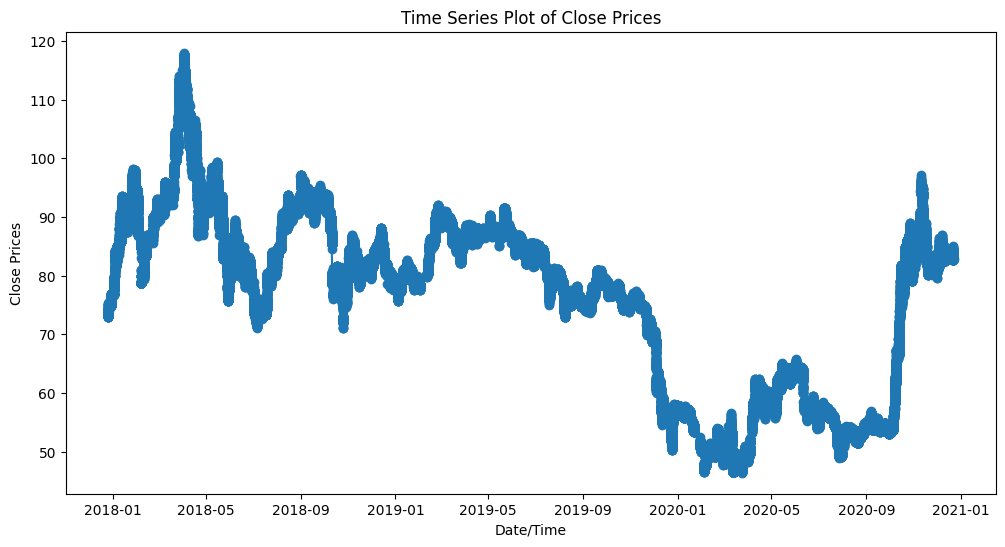

In [16]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], data['Close'], marker='o')
plt.title('Time Series Plot of Close Prices')
plt.xlabel('Date/Time')
plt.ylabel('Close Prices')
plt.show()

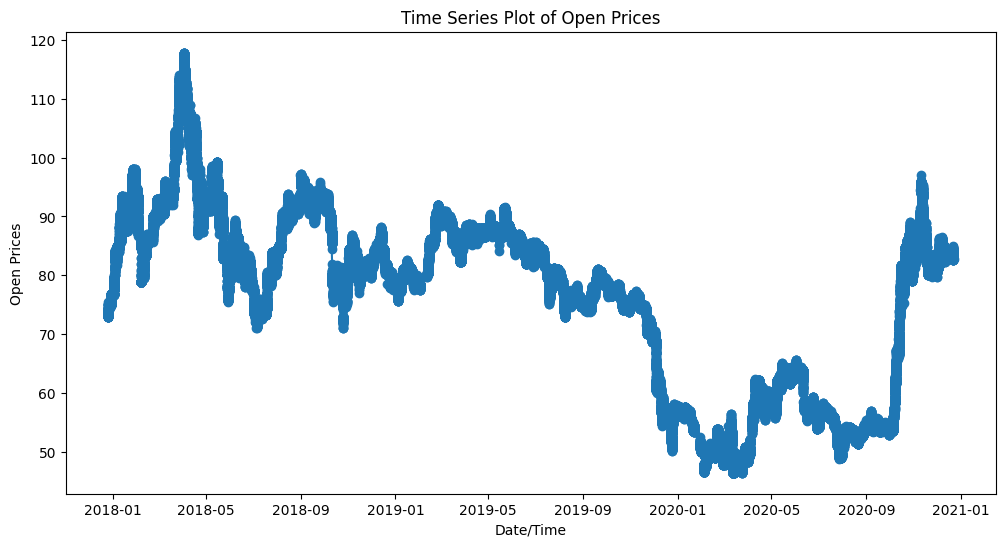

In [17]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], data['Open'], marker='o')
plt.title('Time Series Plot of Open Prices')
plt.xlabel('Date/Time')
plt.ylabel('Open Prices')
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_1, target, test_size=0.2, random_state=42)


In [24]:
model.fit(X_train, y_train)



DecisionTreeRegressor()

In [25]:
predictions = model.predict(X_test)


In [26]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.018353259227791956


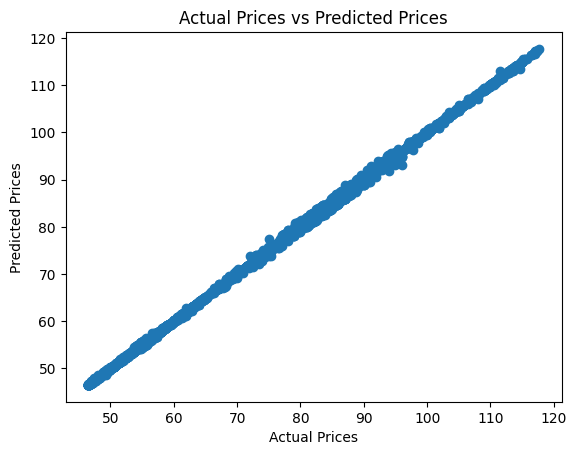

In [29]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()